$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°1| Visualización y pre-procesamiento de datos}$$



### Grupo N°4:

- Alonso Santiago Morán Espinoza
- Sergio Enrique Moreno Elescano

## Carga de dataset y librerias

1) El primer paso para la resolución del ejercicio práctico es la carga de librerías y el dataset denominado "cancer_challenge_cl2.csv" utilizando la libtería pandas

In [71]:
# Importación de librerías

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Visualizamos los encabezados junto a los valores de cada columna
# Hacemos uso de la variable df_cancer

df_cancer = pd.read_csv("cancer_challenge_cl2.csv")
df_cancer.head()


,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,-1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Análisis preliminar de los datos

Se pueden observar que hay 31 columnas que muestran todos los datos del archivo, a continuación se menciona cada una de ellas y una breve descripción de la información que contiene. Para esto se consultaron las siguientes fuentes:

- W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
- O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
- W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

A continuación se muestran las características.

- Mean radius: Es el promedio de distancias desde el centro hacia los puntos del perímetro.
- Mean texture: La desviación estándar de los valores en escala de grises.
- Mean perimeter: Promedio de perímetros
- Mean area: Promedio de áreas.
- Mean smoothness: Promedio de variaciones locales en la longitud del radio.
- Mean compactness: Se obtuvo del cuadrado del perímetro dividido en entre el área menos 1.
- Mean concavity: Muestra el promedio de la severidad de la porciones cóncaves en el contorno.
- Mean concave points: Número de porciones cóncaves en el contorno.
- Mean symmetry: Media de la simetría.
- Mean fractal dimension
- Radius error
- Texture error
- Perimeter Error
- Area error
- Smoothness error
- Compactness error
- Concavity error
- Concave points error
- Symmetry error
- Fractal dimension error
- Worst radiues
- Worst texture
- Worst perimeter
- Worst area
- Worst smoothness
- Worst compactness
- Worst concavity
- Worst concave points
- Worst symmetry
- Worst fractal dimension
- Target: Valor binario que indica la presencia o asunecia de cáncer


## Análisis Exploratorio

2. Ahora se ingresará la información contenida en la variable df_cancer que corresponde a cada columna, se verifica la cantidad de valores que no son nulos.

In [72]:
# Se imprime la información de cada columna

print(df_cancer.info())
df_cancer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              567 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           564 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      562 non-null    float64
 9   mean symmetry            566 non-null    float64
 10  mean fractal dimension   561 non-null    float64
 11  radius error             564 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,567.000000,569.000000,564.000000,569.000000,569.000000,569.000000,569.000000,562.000000,566.000000,...,569.000000,564.000000,569.000000,566.000000,569.000000,564.000000,565.000000,563.000000,562.000000,563.000000
mean,284.000000,15.293573,19.434938,92.199947,650.421265,0.245386,0.104341,0.088799,0.191178,0.281227,...,25.603146,107.377819,880.583128,0.132362,2.844961,0.273048,0.135599,0.290270,0.084044,0.632327
std,164.400426,27.600997,5.445044,24.280344,359.317697,2.516184,0.052813,0.079720,3.372755,1.713647,...,6.436019,33.722701,569.356993,0.022869,39.677091,0.209031,0.504349,0.062084,0.018120,0.518161
min,0.000000,6.981000,9.710000,43.790000,-1001.000000,0.052630,0.019380,0.000000,0.000000,0.106000,...,-20.000000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,142.000000,11.710000,16.170000,75.412500,418.700000,0.086370,0.064920,0.029560,0.020362,0.161925,...,21.060000,84.102500,515.300000,0.116600,0.147700,0.115925,0.064130,0.250450,0.071827,0.000000
50%,284.000000,13.400000,18.870000,86.545000,546.300000,0.095920,0.092630,0.061540,0.033600,0.179350,...,25.410000,97.745000,686.500000,0.131300,0.215600,0.227450,0.099750,0.282300,0.080075,1.000000
75%,426.000000,15.935000,21.810000,104.400000,782.600000,0.105400,0.130400,0.130700,0.074030,0.195700,...,29.720000,126.000000,1084.000000,0.146000,0.341600,0.385300,0.162500,0.318150,0.092105,1.000000
max,568.000000,666.000000,99.000000,188.500000,2501.000000,45.000000,0.345400,0.426800,80.000000,34.000000,...,49.540000,251.200000,4254.000000,0.222600,666.000000,1.252000,12.000000,0.663800,0.207500,5.000000


Se puede observar que hay ciertos datos nulos en el archivo a trabajar. Más adelante se propondrá una estrategia para lidiar con est etipo de datos.
A continuación se evalua el balance de la información con la que se cuenta y su relación con el target propuesto, es decir, si hay o no cáncer en la muestra.
Para esto se muestra un histograma utilizando la columna de target.

3) Evalua si la data esta balanceada para el target propuesto. Comenta tus resultados

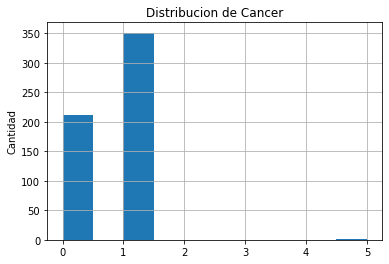

In [73]:
plt.hist(df_cancer['target'])
plt.title('Distribucion de Cancer')
plt.grid()
plt.ylabel("Cantidad")
plt.show()

Analizando el Histograma podemos concluir que si se podrá trabjar con los datos, sin emabrgo, estos deben ser procesados previamente ya que se cuenta con un valor anómalo que no es binario.

## Visualización de la data

A continuación, se propone un análasis visual más profundo de los datos propuestos. Para esto se observará lo siguiente:

- Distribución de cada variable
- Relación existente entre las variables
- Outlier en las variables

Este paso resulta fundamental para posteriormente procesar los datos según sea necesario.

### Distribucion de las variables

Valor anomalo corregido


C:\Users\alons\AppData\Local\Temp\ipykernel_9332\3476320017.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancer['target'][130]=1


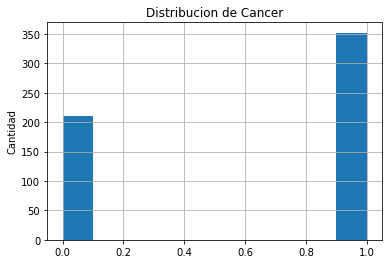

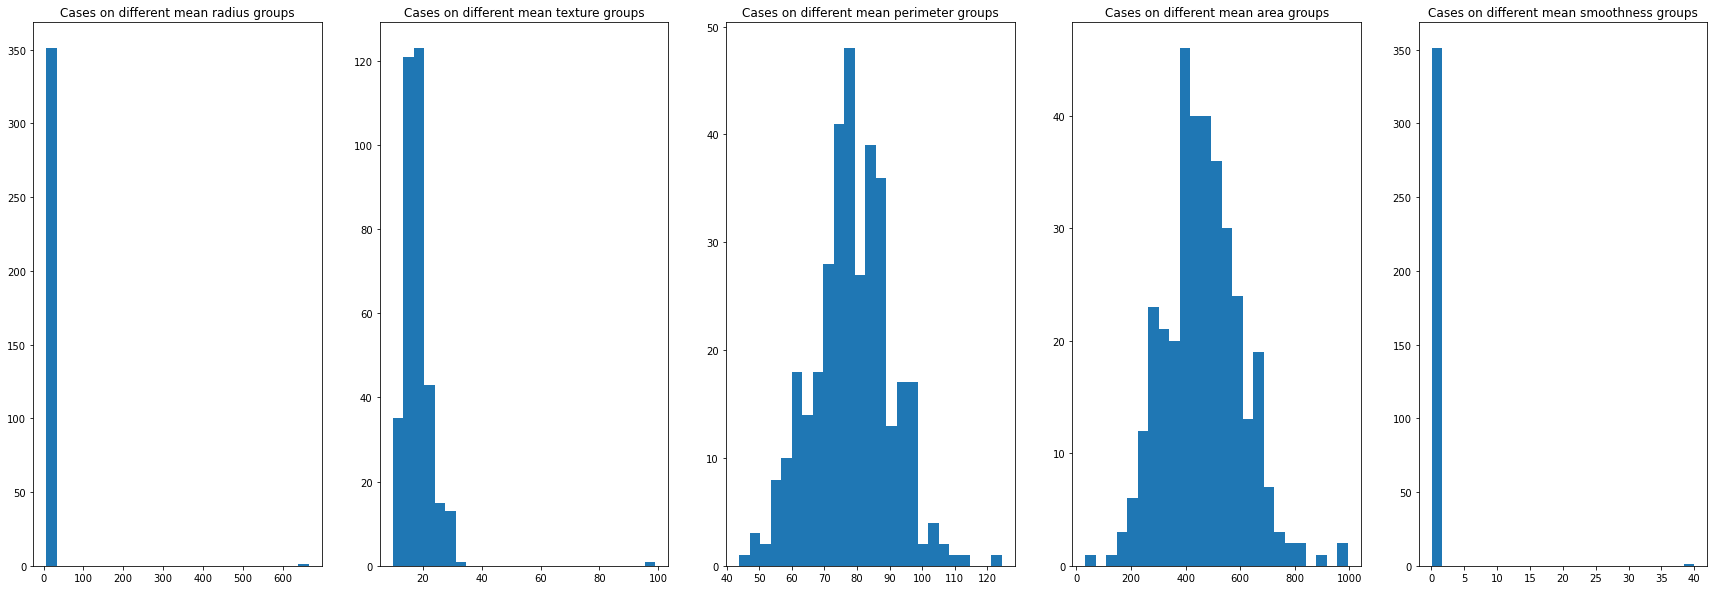

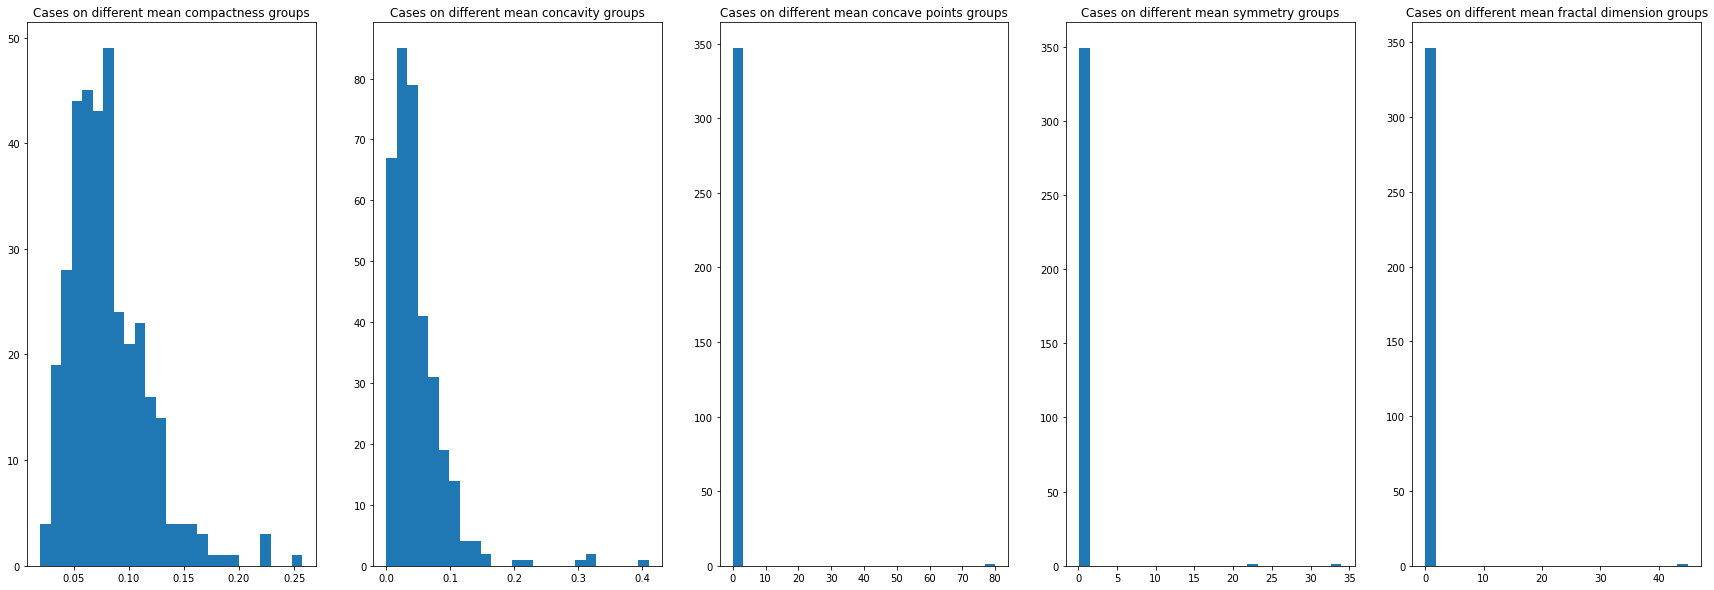

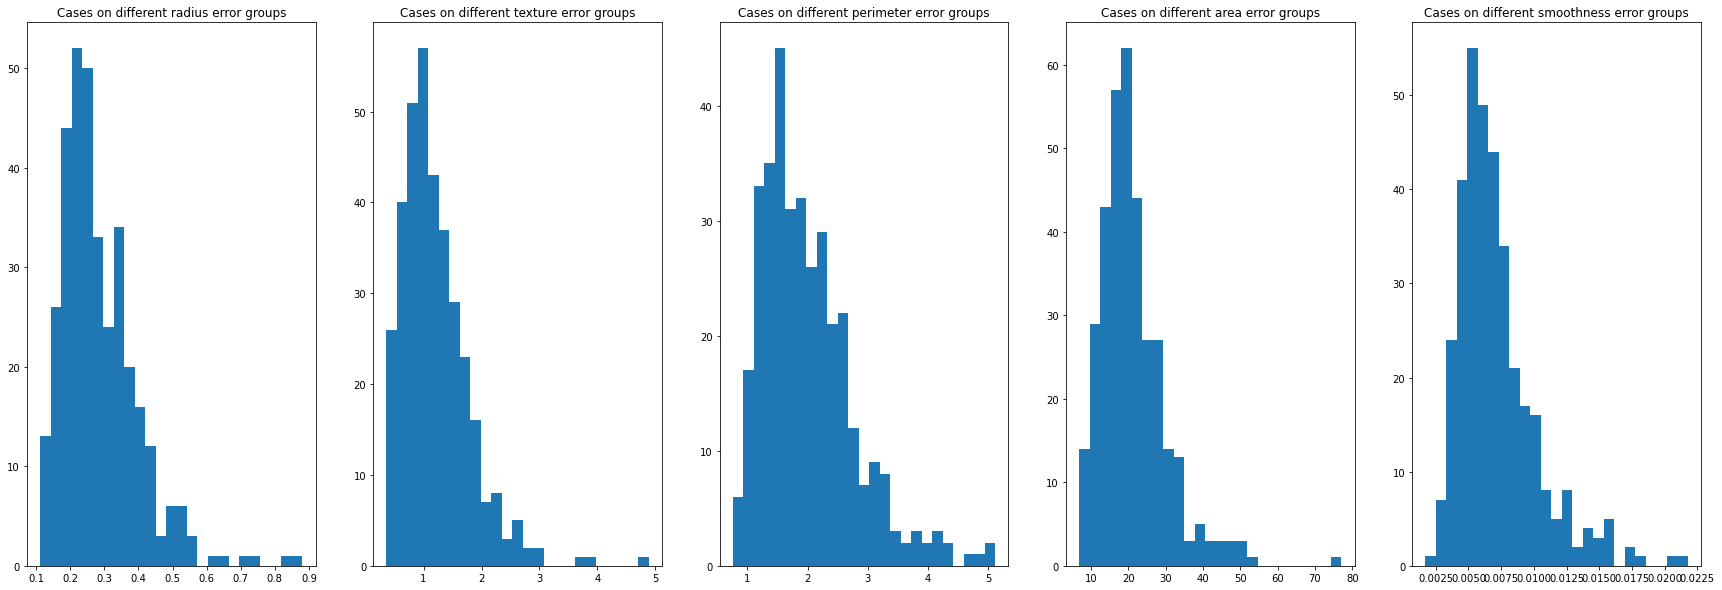

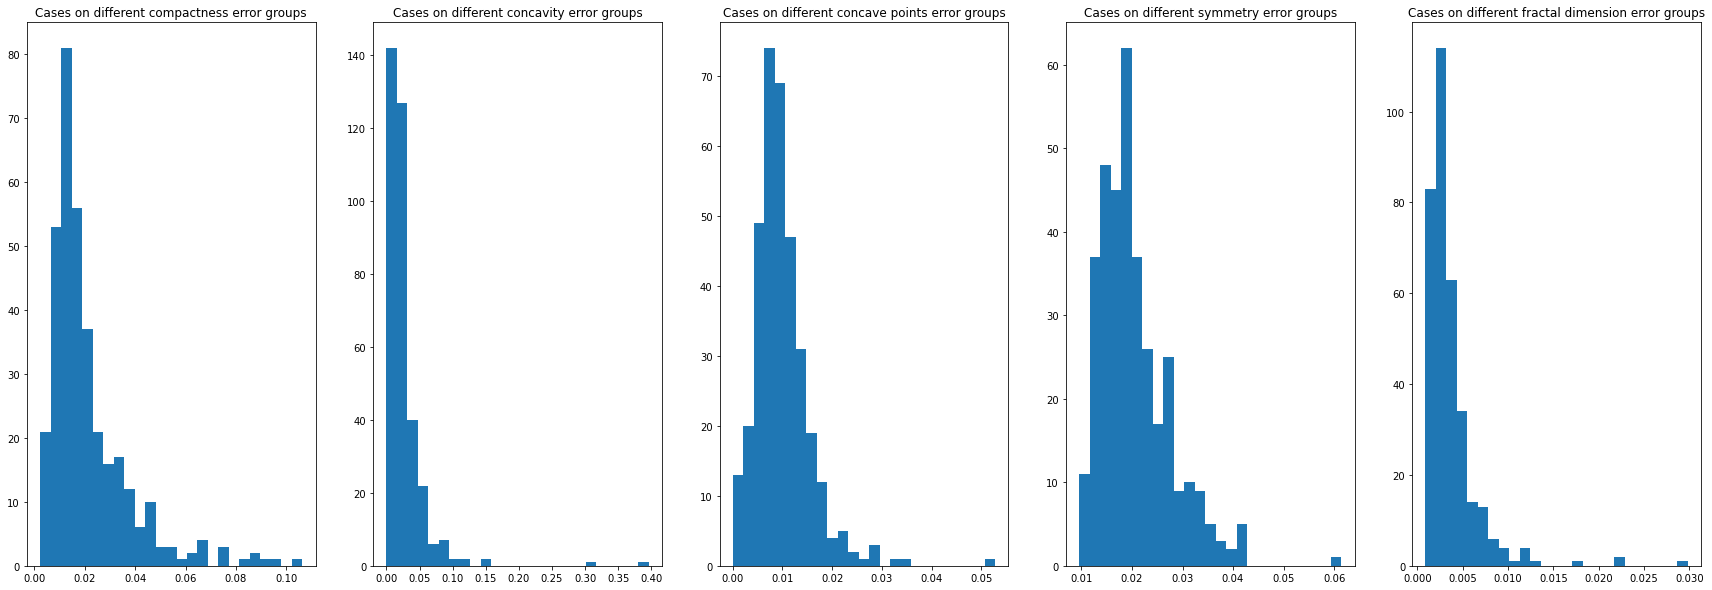

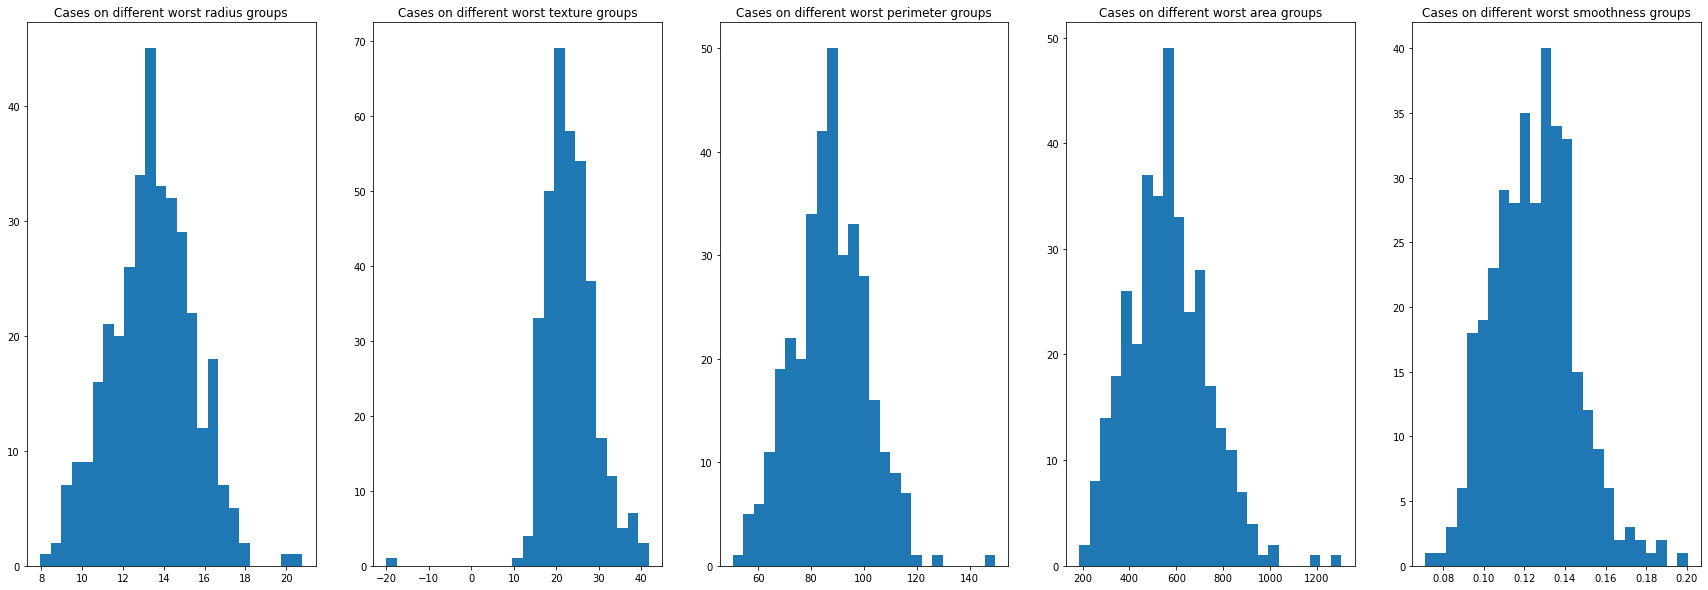

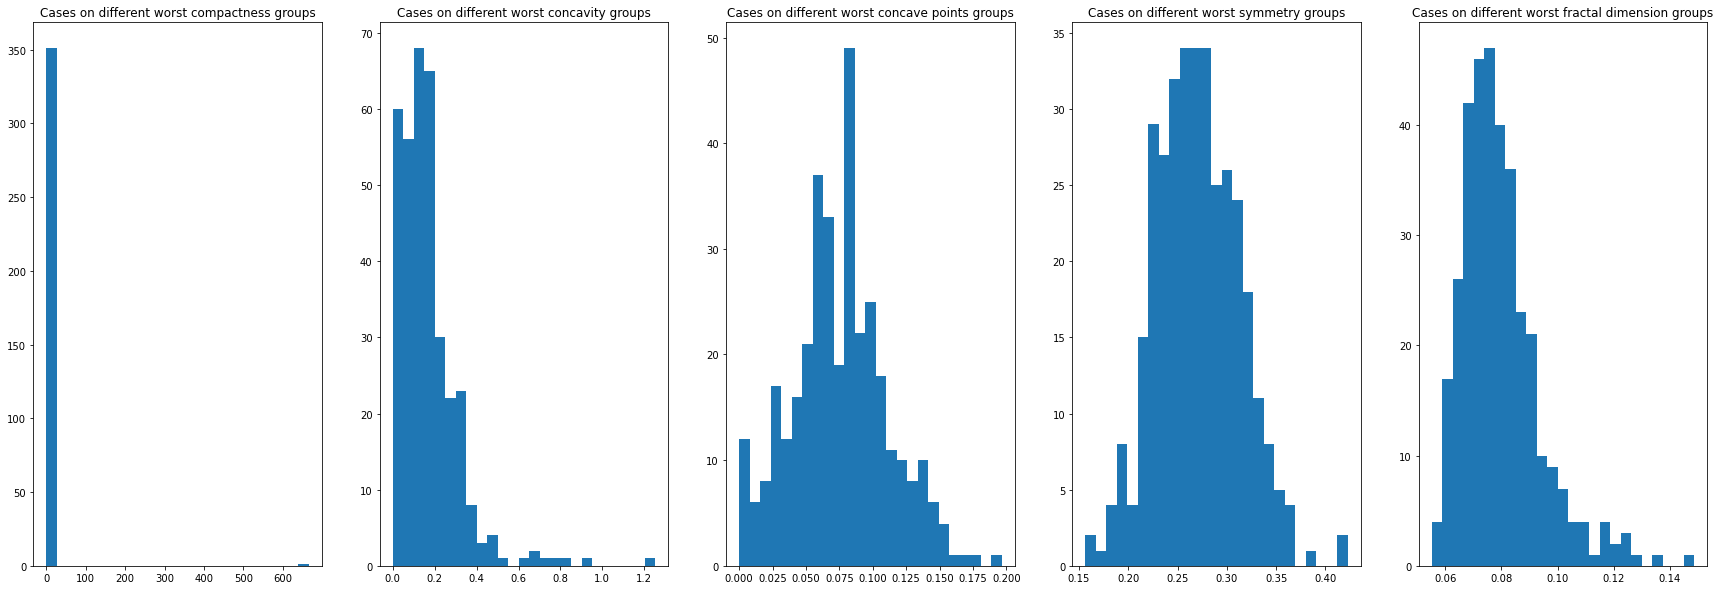

In [74]:
# Almacenamos en la variable pacientes a los que contienen cancer

# Para este caso consideraremos que el valor de 5 hace referencia a que hay presencia de cancer, el objetivo es mantener binarios lo datos

for condicion in df_cancer['target']:
    if condicion == 5:
        print('Valor anomalo corregido')
        df_cancer['target'][130]=1

plt.hist(df_cancer['target'])
plt.title('Distribucion de Cancer')
plt.grid()
plt.ylabel("Cantidad")
plt.show()
pacientes = df_cancer[df_cancer['target'] == 1]

fig, axs = plt.subplots(1, 5, figsize=(30, 10))
fig2, axs2 = plt.subplots(1, 5, figsize=(30, 10))
fig3, axs3  = plt.subplots(1,5,figsize=(30,10))
fig4, axs4  = plt.subplots(1,5,figsize=(30,10))
fig5, axs5  = plt.subplots(1,5,figsize=(30,10))
fig6, axs6  = plt.subplots(1,5,figsize=(30,10))

count = 0
for feature in ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']:
    axs[count].hist(pacientes[feature], bins=25)
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']:
    axs2[count].hist(pacientes[feature], bins=25)
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error']:
    axs3[count].hist(pacientes[feature], bins=25)
    axs3[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']:
    axs4[count].hist(pacientes[feature], bins=25)
    axs4[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness']:
    axs5[count].hist(pacientes[feature], bins=25)
    axs5[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']:
    axs6[count].hist(pacientes[feature], bins=25)
    axs6[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()

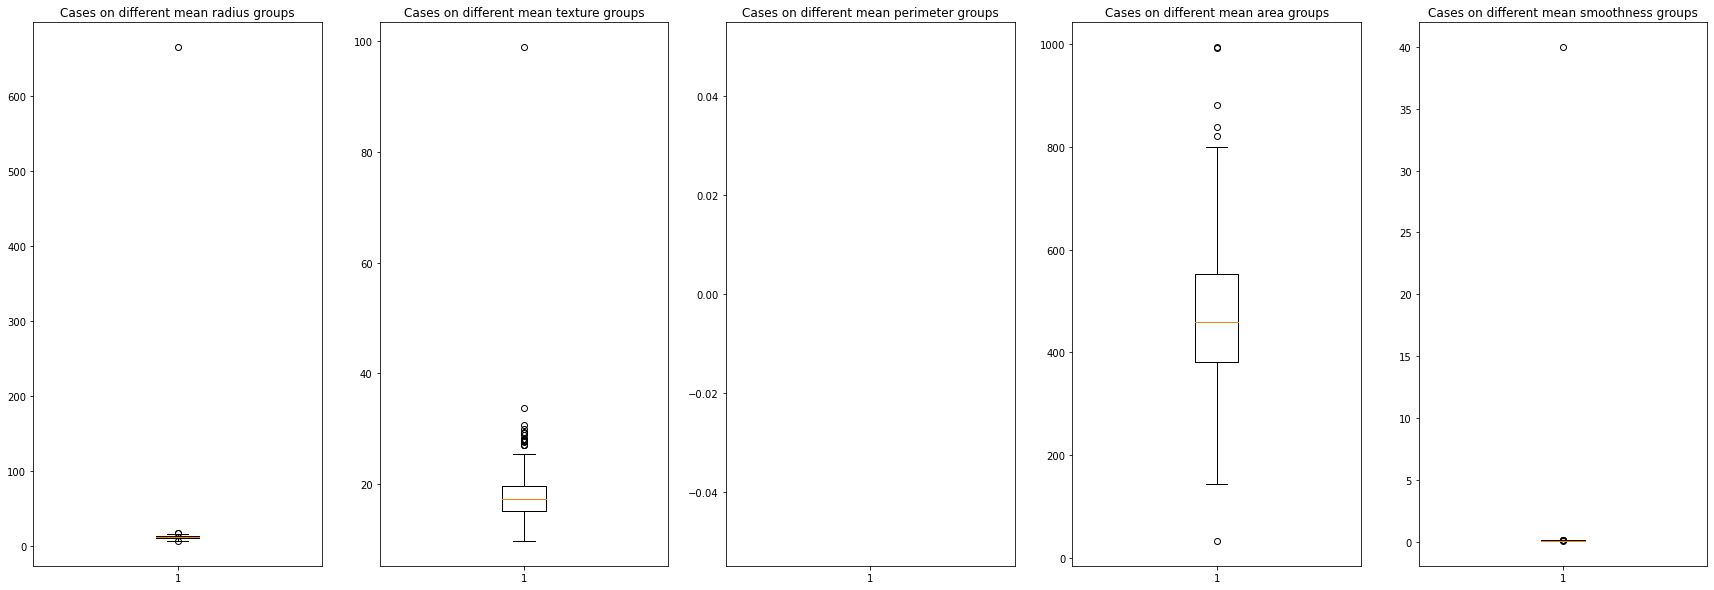

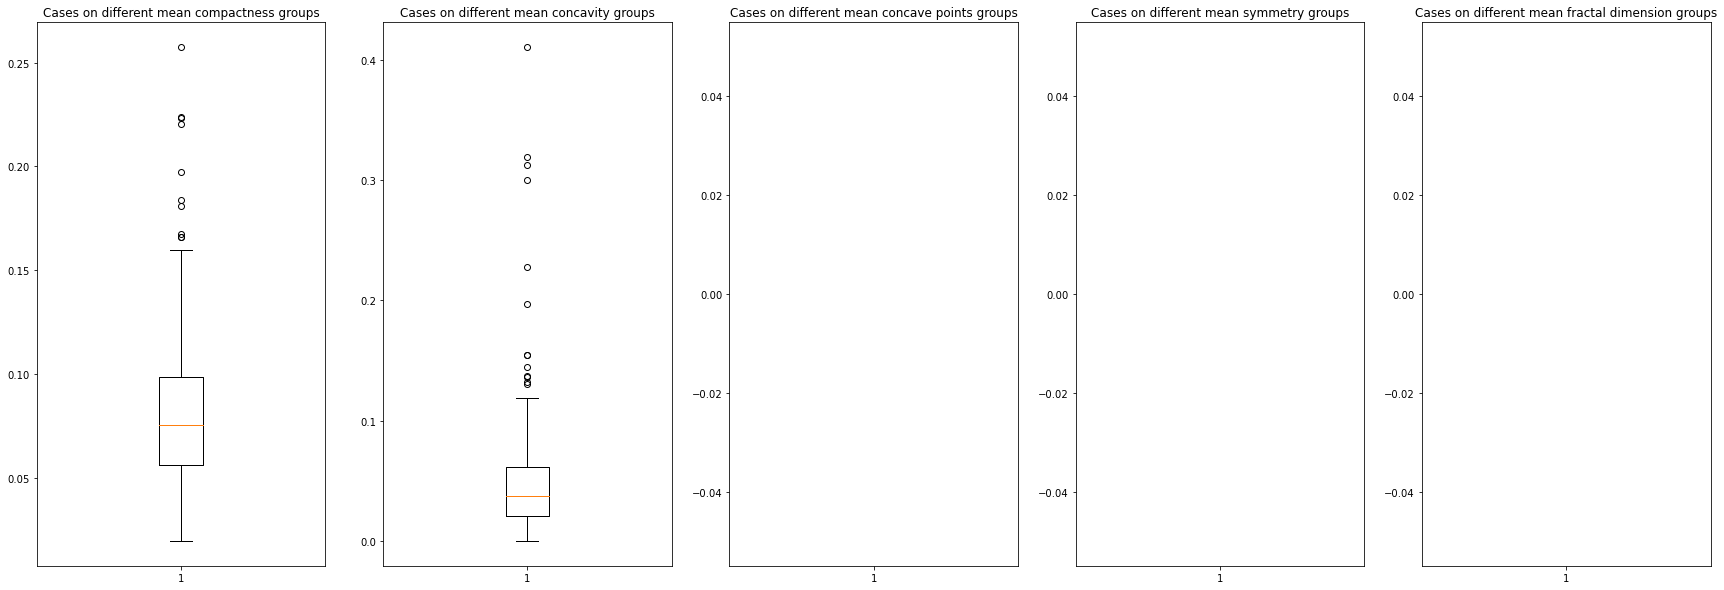

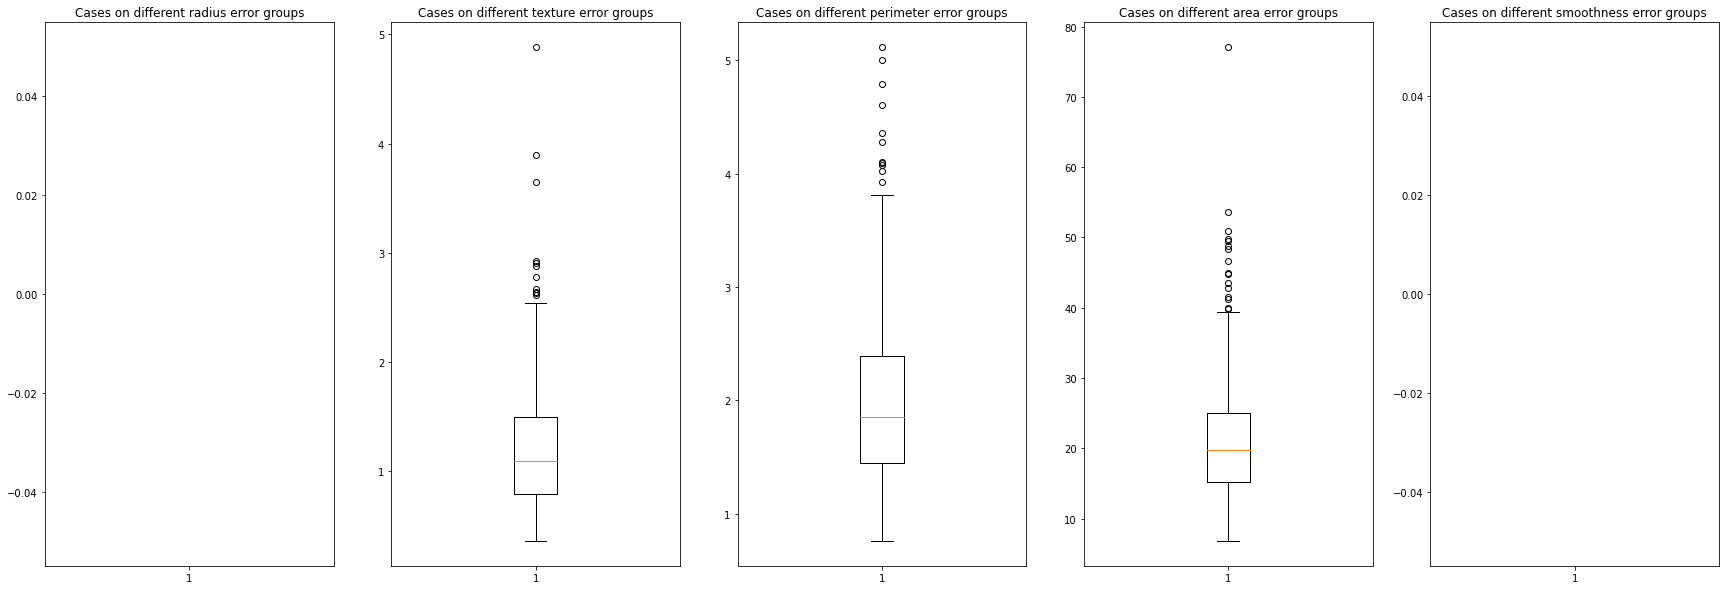

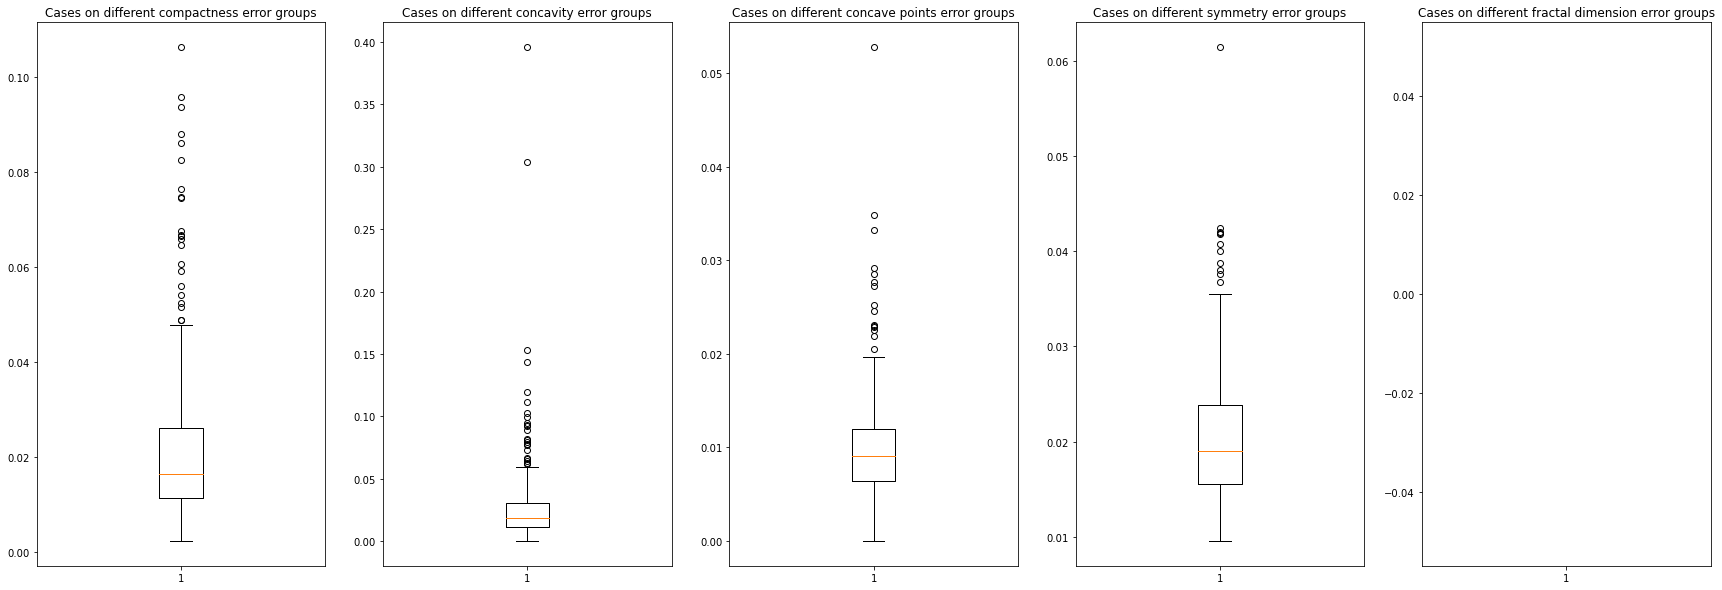

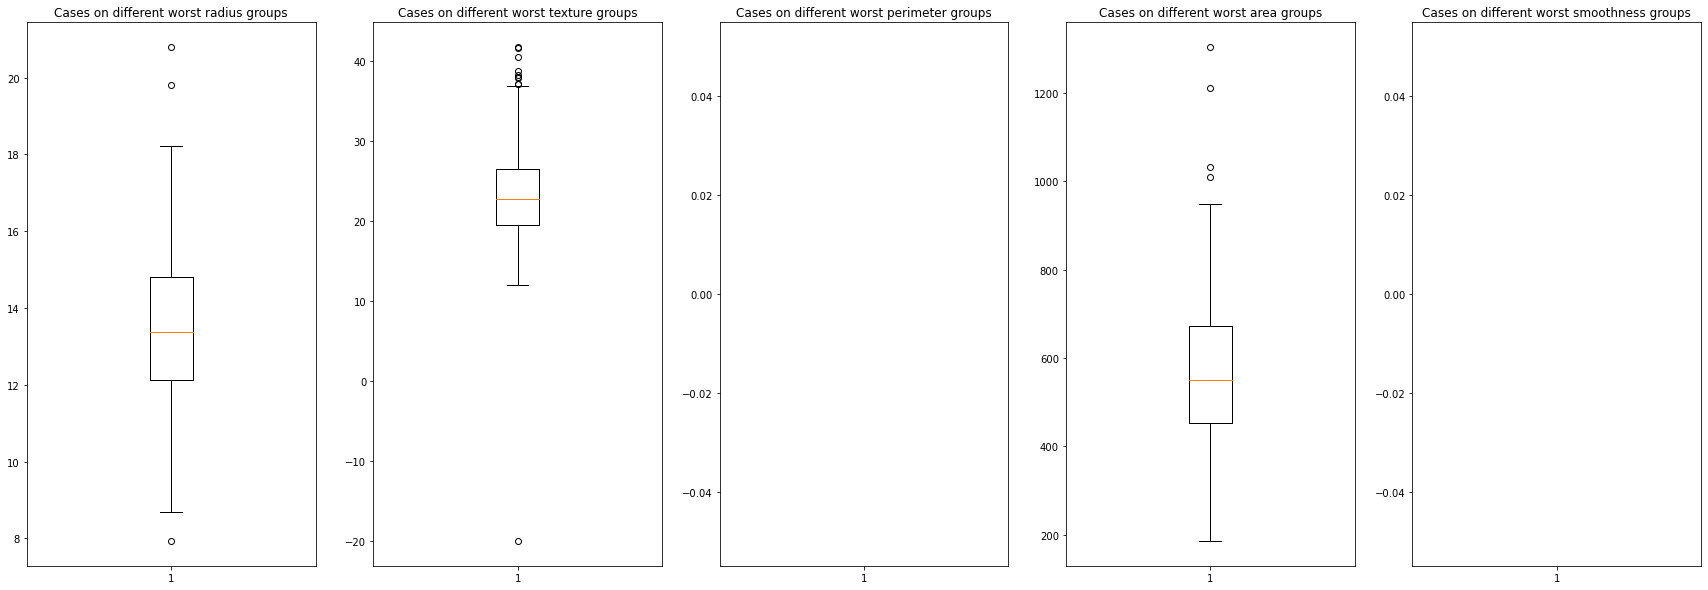

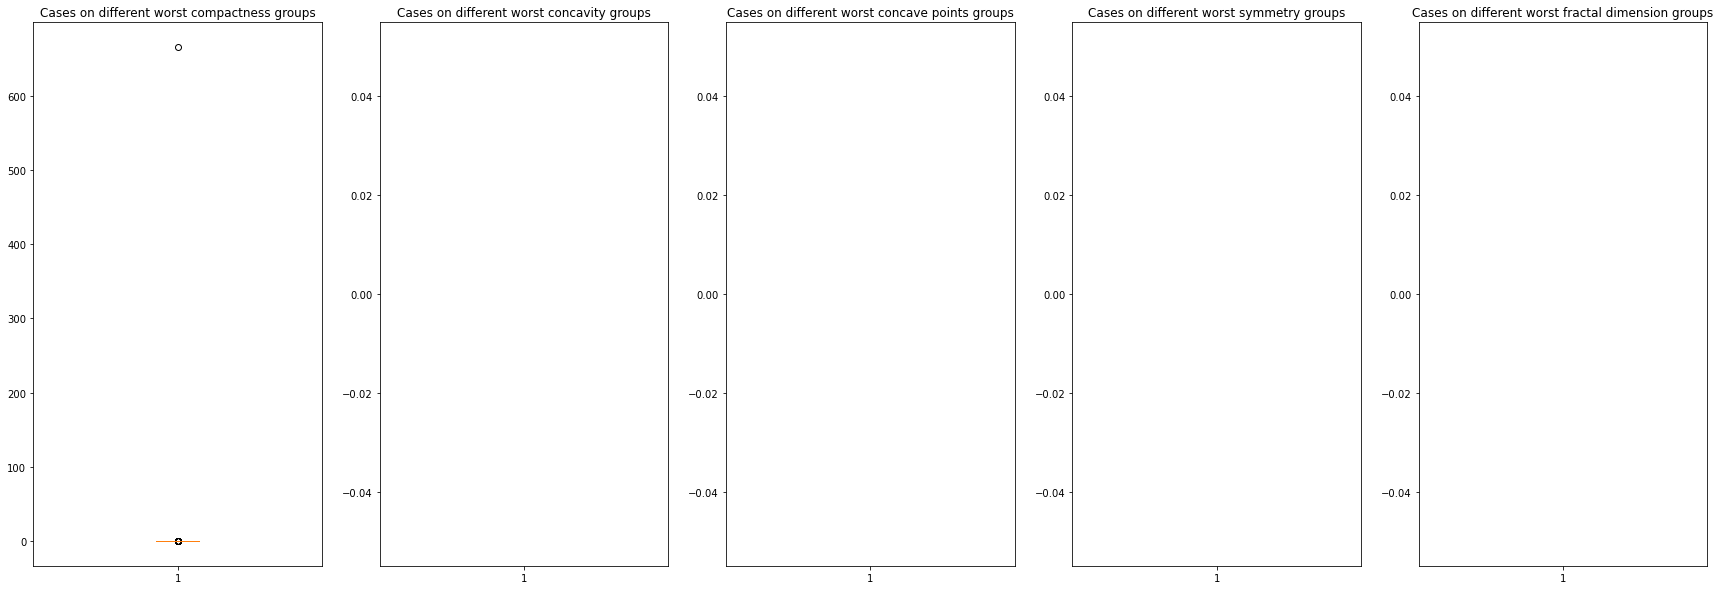

In [75]:
fig, axs = plt.subplots(1, 5, figsize=(30, 10))
fig2, axs2 = plt.subplots(1, 5, figsize=(30, 10))
fig3, axs3  = plt.subplots(1,5,figsize=(30,10))
fig4, axs4  = plt.subplots(1,5,figsize=(30,10))
fig5, axs5  = plt.subplots(1,5,figsize=(30,10))
fig6, axs6  = plt.subplots(1,5,figsize=(30,10))

count = 0
for feature in ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']:
    axs[count].boxplot(pacientes[feature])
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']:
    axs2[count].boxplot(pacientes[feature])
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error']:
    axs3[count].boxplot(pacientes[feature])
    axs3[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']:
    axs4[count].boxplot(pacientes[feature])
    axs4[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness']:
    axs5[count].boxplot(pacientes[feature],)
    axs5[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']:
    axs6[count].boxplot(pacientes[feature])
    axs6[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()


<AxesSubplot:>

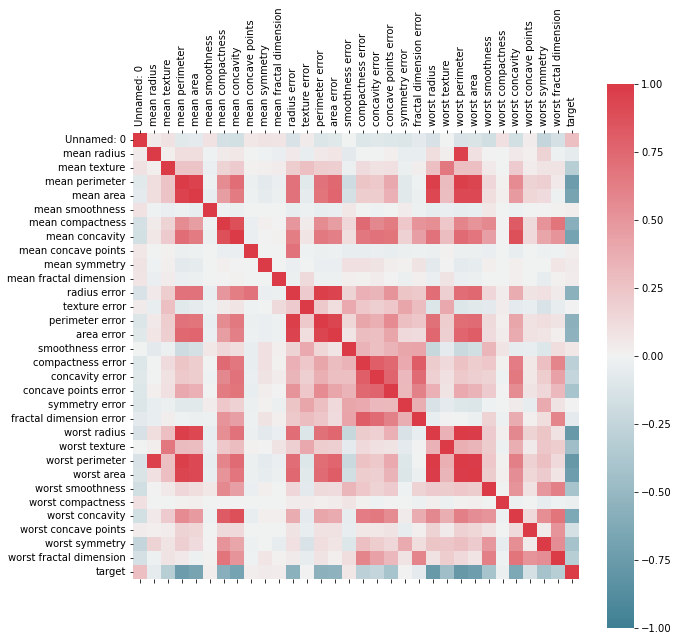

In [76]:
import seaborn as sns
#plt.matshow(df_heart.corr())
#plt.show()
#
corr = df_cancer.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

## Pre-procesamiento

Analizando los gráficos mostrados anteriormente, resulta conveniente la eliminación de outliers que perjudican el tratamiento adecuado de los datos- Estos outliers están presentes en las siguientes características:
Para el tratamienot de los outliers aplicamos la relación porporcionada en clase que indica que se consideran a los valores fuera del intervalo: (Q1 - 3 x IQR, Q3 + 3 x IQR) Como outliers
Los outliers identificados son los siguientes:

- Mean radius: valores mayores a 600
- Mean texture: Valores mayores a 90
- Mean smoothness: Valores mayores a 35
- Mean compactness: Valores mayores a 0.25
- Mean concavity: Valores mayores a 0.4
- Texture error: Valores mayores a 4
- Area error: Valores mayores a 70
- Compactness error: Valores mayor a 0.10
- Concavity error: Valores mayores a 0.25
- Concave points error: Valores mayores a 0.04
- Symmetry error: Valores mayores a 0.05
- Worst radius: Valores menores a 8
- Worst texture: Valores menores a -10
- Worst compactness: Valores mayores a 600

6) Ejecuta la limpieza de datos según el criterio analizado previamente. Evalua la cantidad de datos crudos vs la cantidad de datos que quedan posterior a la limpieza.

In [77]:
print('Data size before cleaning: ', len(df_cancer))
df_cancer_clean = df_cancer[(df_cancer['mean radius'] < 600) &
                         (df_cancer['mean texture'] < 90) & (df_cancer['mean smoothness']<35) & (df_cancer['mean compactness']<0.25) & (df_cancer['mean concavity']<0.4) & (df_cancer['texture error']<4) & (df_cancer['area error']<70) &
                         (df_cancer['compactness error']<0.10) & (df_cancer['concavity error']<0.25) & (df_cancer['symmetry error']<0.05) & (df_cancer['worst radius']>8) & (df_cancer['worst texture']>-10) & (df_cancer['worst compactness']<600)]
print('Data size after cleaning: ', len(df_cancer_clean))

Data size before cleaning:  569
Data size after cleaning:  465
